In [1]:
import pandas as pd
import seaborn as sns

## Groupby: aggrégation

Groupby permet d'aggréger des données ayant des caractéristes communes. Prenons par exemple un DataFrame regroupant des info sur les victimes du Titanic.

In [3]:
df = sns.load_dataset("titanic")
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


On veut séparer les info pour les hommes et les femmes. On pourrait faire ça "à la main" avec une indexation

In [11]:
df.loc[df.sex == "male", "class"].value_counts(normalize=True)

Third     0.601386
First     0.211438
Second    0.187175
Name: class, dtype: float64

In [12]:
df.loc[df.sex == "female", "class"].value_counts(normalize=True)

Third     0.458599
First     0.299363
Second    0.242038
Name: class, dtype: float64

In [13]:
for sex in ["male", "female"]:
    print(df.loc[df.sex == sex, "class"].value_counts(normalize=True))

Third     0.601386
First     0.211438
Second    0.187175
Name: class, dtype: float64
Third     0.458599
First     0.299363
Second    0.242038
Name: class, dtype: float64


Mais il est possible de faire l'opération d'un coup avec `groupby`.

In [18]:
for sex, subdf in df.groupby("sex"):
    print(sex)
    print(subdf["class"].value_counts(normalize=True))

female
Third     0.458599
First     0.299363
Second    0.242038
Name: class, dtype: float64
male
Third     0.601386
First     0.211438
Second    0.187175
Name: class, dtype: float64


On fourni la colonne indiquant la catégorie permettant de regrouper les données, puis une fonction d'aggrégat.

In [26]:
df.groupby("sex")["class"].value_counts(normalize=True)

sex     class 
female  Third     0.458599
        First     0.299363
        Second    0.242038
male    Third     0.601386
        First     0.211438
        Second    0.187175
Name: class, dtype: float64

In [23]:
df.groupby("sex")["age"].quantile([0.25, 0.75])

sex         
female  0.25    18.0
        0.75    37.0
male    0.25    21.0
        0.75    39.0
Name: age, dtype: float64

Il est possible d'itérer sur le `groupby`, ce qui renverra le nom des catégories et le subset du dataframe correspondant.

In [49]:
for kind, subdf in df.groupby("who"):
    print(kind)
    print(subdf[["age", "survived"]])

child
       age  survived
7     2.00         0
9    14.00         1
10    4.00         1
14   14.00         0
16    2.00         0
..     ...       ...
831   0.83         1
850   4.00         0
852   9.00         0
869   4.00         1
875  15.00         1

[83 rows x 2 columns]
man
      age  survived
0    22.0         0
4    35.0         0
5     NaN         0
6    54.0         0
12   20.0         0
..    ...       ...
883  28.0         0
884  25.0         0
886  27.0         0
889  26.0         1
890  32.0         0

[537 rows x 2 columns]
woman
      age  survived
1    38.0         1
2    26.0         1
3    35.0         1
8    27.0         1
11   58.0         1
..    ...       ...
880  25.0         1
882  22.0         0
885  39.0         0
887  19.0         1
888   NaN         0

[271 rows x 2 columns]


Il est aussi possible de créer des intervals de valeurs continues et de faire un aggrégat à partir de ces intervals :

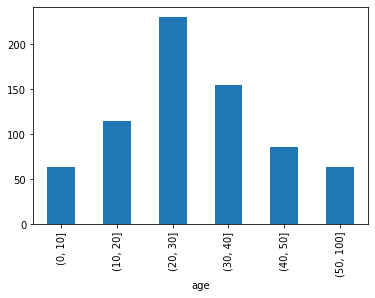

In [29]:
bins = pd.cut(df.age, [0, 10, 20, 30, 40, 50, 100]) # on crée 10 intervals sur l'age
count_by_age = df.age.groupby(bins).count() # on comptabilise les catégories d'ages
count_by_age.plot(kind="bar")

In [34]:
bins = pd.cut(df.age, [0, 10, 20, 30, 40, 50, 100]) # on crée 10 intervals sur l'age
mean_by_age = df.survived.groupby(bins).mean() # on comptabilise les catégories d'ages
mean_by_age

age
(0, 10]      0.593750
(10, 20]     0.382609
(20, 30]     0.365217
(30, 40]     0.445161
(40, 50]     0.383721
(50, 100]    0.343750
Name: survived, dtype: float64

Si ce n'est qu'à but d'affichage, il est possible d'utiliser directement un histogramme :

In [31]:
import pylab as pl

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

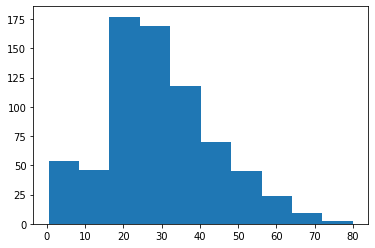

In [32]:
pl.hist(df.age.dropna())

**La méthode groupby est complexe, et accepte aussi de prendre une collection quelconque pour faire la séparation du DataFrame. Elle permet de d'aggréger, de filtrer, d'appliquer des fonctions à une sous-partie des DataFrames.**

Pour plus d'info, il est possible de référer au [guide utilisateur pandas correspondant](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html).

In [43]:
df.groupby("class").agg({"age": ("min", "mean", "max"),
                         "survived": ("mean", "sum", "count")})

age                   survived           
         min       mean   max      mean  sum count
class                                             
First   0.92  38.233441  80.0  0.629630  136   216
Second  0.67  29.877630  70.0  0.472826   87   184
Third   0.42  25.140620  74.0  0.242363  119   491

In [47]:
subdf = df.loc[df.sex == "female"]
subdf[subdf.age == subdf.age.max()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
275,1,1,female,63.0,1,0,77.9583,S,First,woman,False,D,Southampton,yes,False
483,1,3,female,63.0,0,0,9.5875,S,Third,woman,False,NaN,Southampton,yes,True


In [53]:
gb = df.groupby("class")